# Final project Env DS

This environmental data science study purposes on analyzing the water quality
dataset, primarily considering the value of pH, Dissolved Oxygen (DO),
Temperature, and Conductivity to forecast the Biochemical Oxygen Demand
(BOD) index. Given that several parameters are considered as reference points
in this study, we are particularly interested in identifying the most significant
factor that could strongly influence the predictions. To achieve this, we plan to
employ Linear Regression, Ridge Regression, and Lasso Regression models for
training and assess the reliability of each model using the Root Mean Squared
Error (RMSE) metric. In this way, we aim to find the most influential factor and
select the model that best fits the dataset. Finally, we will engage in further
discussions based on the results.

Necessary imports :

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('Water Quality Testing.csv')

## Quick EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Sample ID                500 non-null    int64  
 1   pH                       500 non-null    float64
 2   Temperature (°C)         500 non-null    float64
 3   Turbidity (NTU)          500 non-null    float64
 4   Dissolved Oxygen (mg/L)  500 non-null    float64
 5   Conductivity (µS/cm)     500 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 23.6 KB


In [4]:
df.head()

,Sample ID,pH,Temperature (°C),Turbidity (NTU),Dissolved Oxygen (mg/L),Conductivity (µS/cm)
0,1,7.25,23.1,4.5,7.8,342
1,2,7.11,22.3,5.1,6.2,335
2,3,7.03,21.5,3.9,8.3,356
3,4,7.38,22.9,3.2,9.5,327
4,5,7.45,20.7,3.8,8.1,352


In [7]:
print(df.isnull().sum())


Sample ID                  0
pH                         0
Temperature (°C)           0
Turbidity (NTU)            0
Dissolved Oxygen (mg/L)    0
Conductivity (µS/cm)       0
dtype: int64


### Basic visualisation

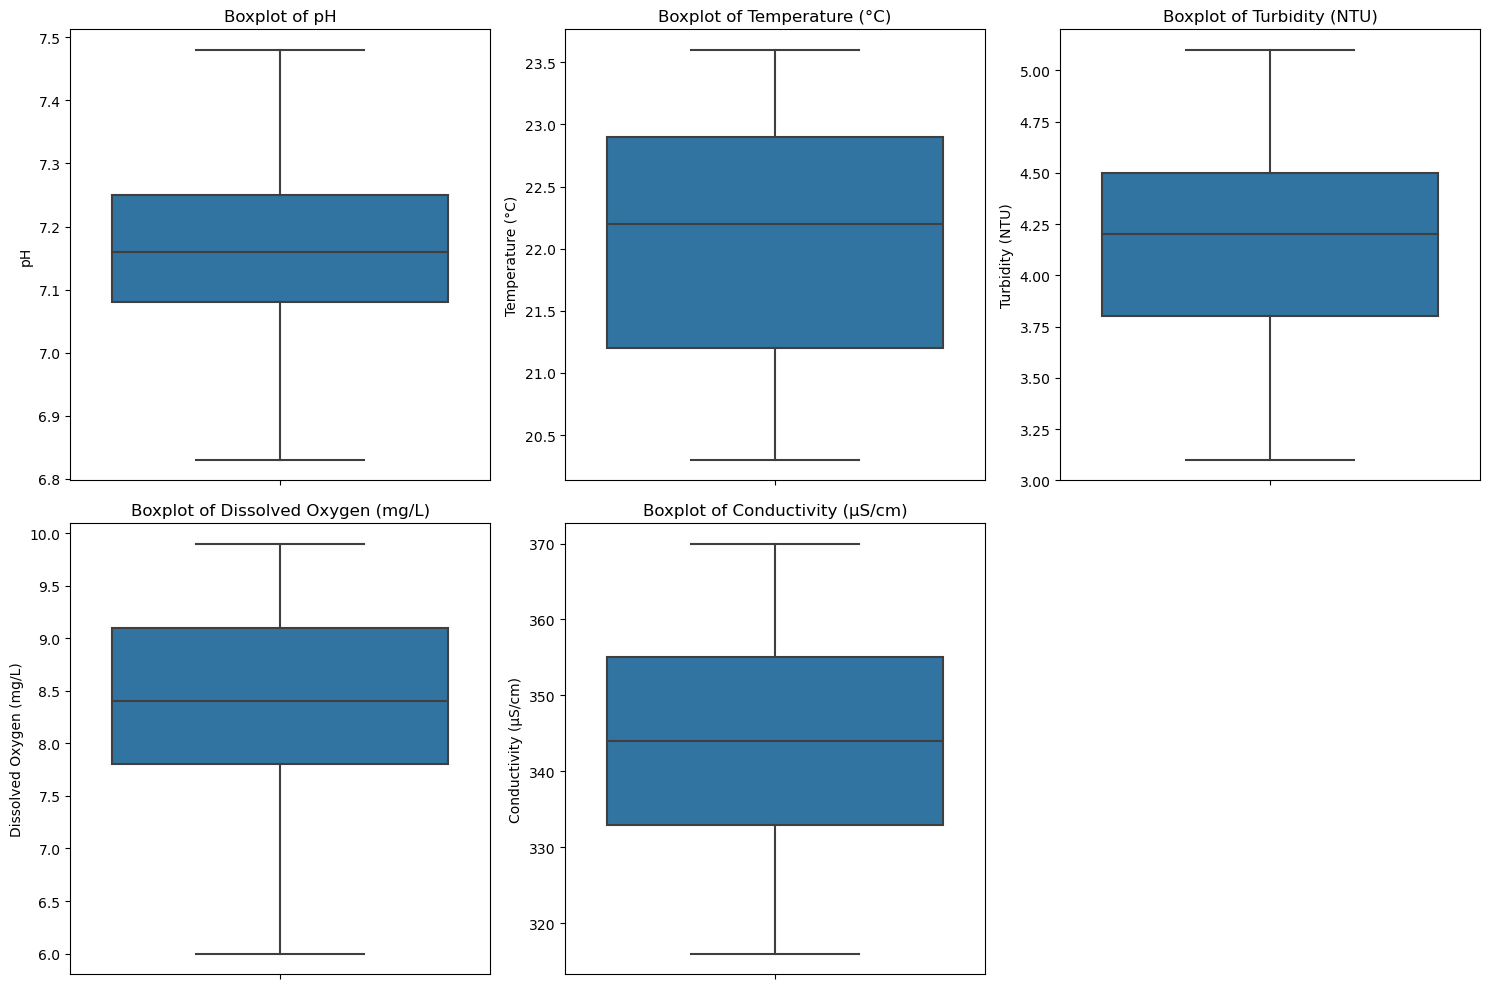

In [11]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[1:], 1):  # skipping 'Sample ID'
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()


d:\Anaconda\envs\M1Python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\envs\M1Python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\envs\M1Python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\envs\M1Python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

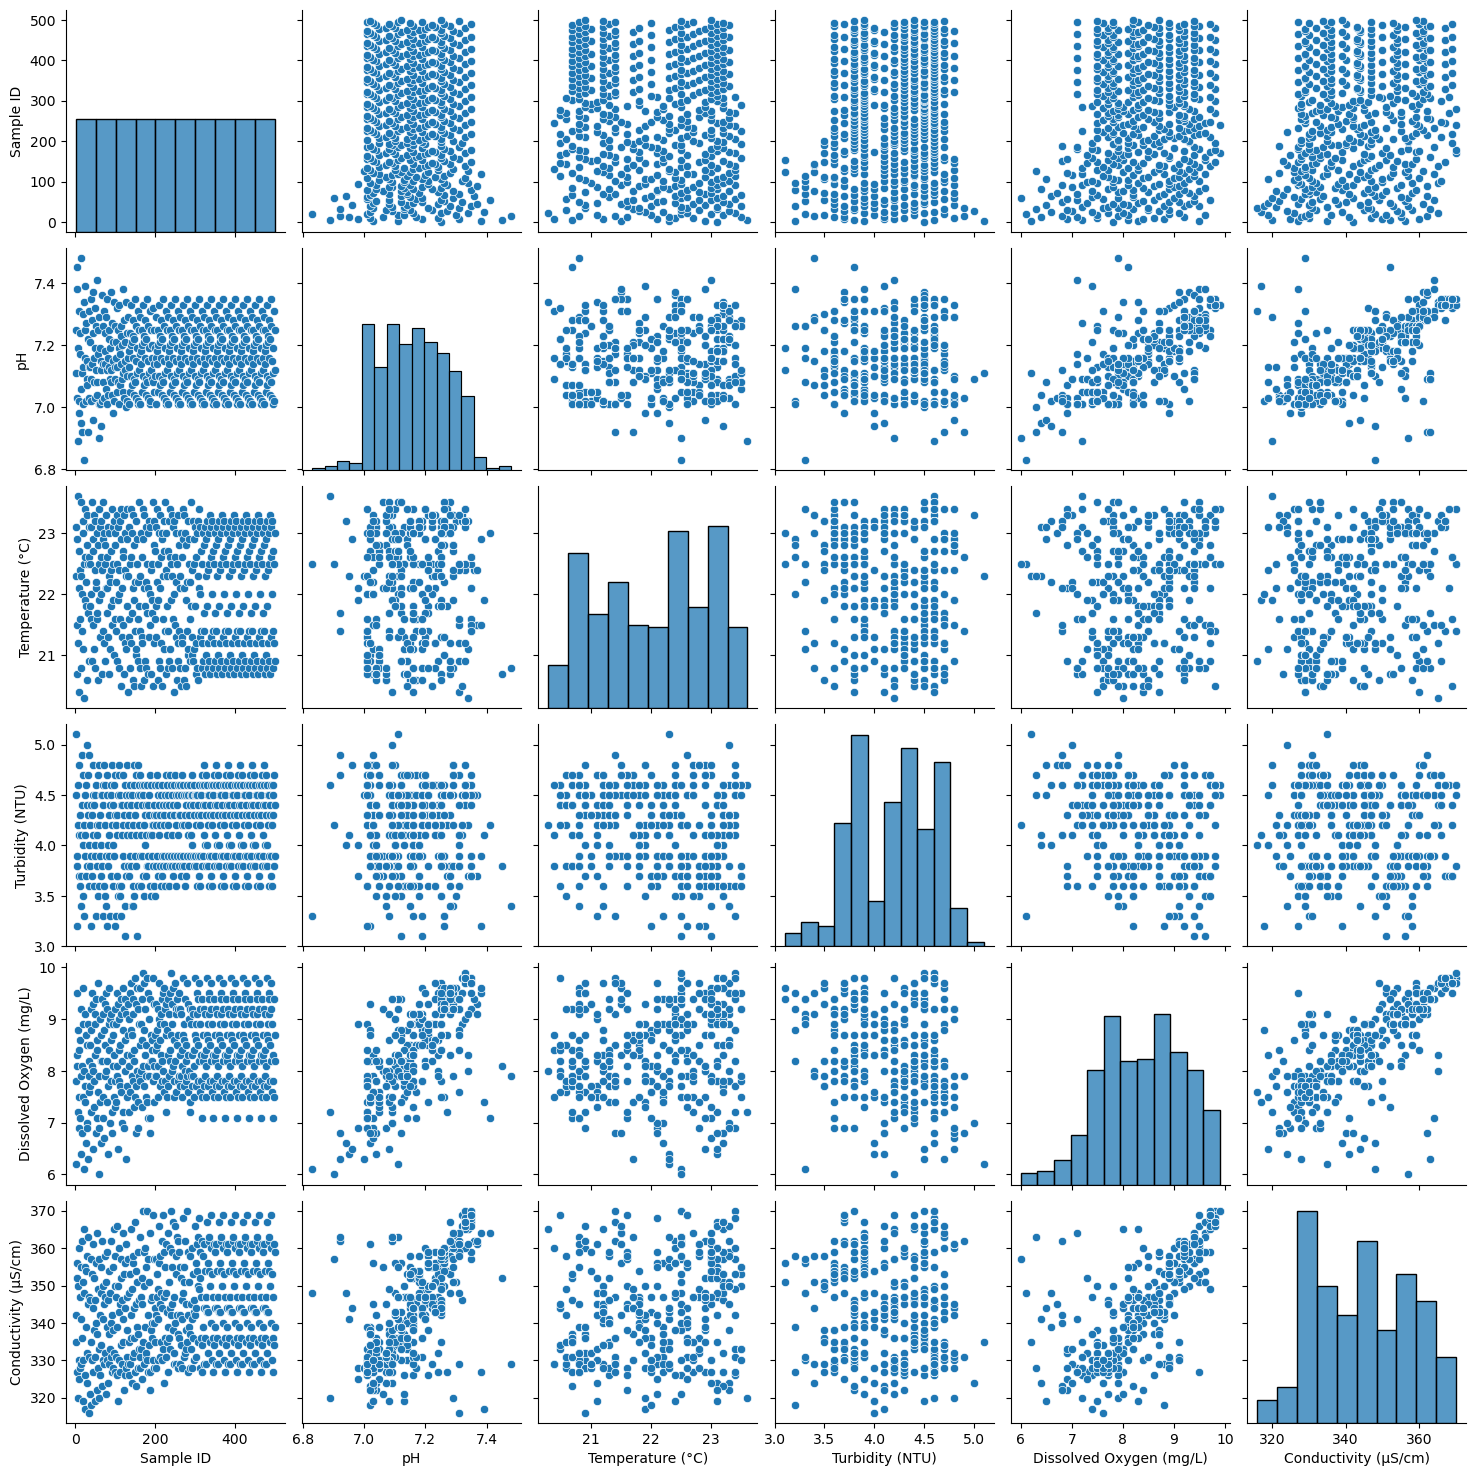

In [12]:
sns.pairplot(df)
plt.show()

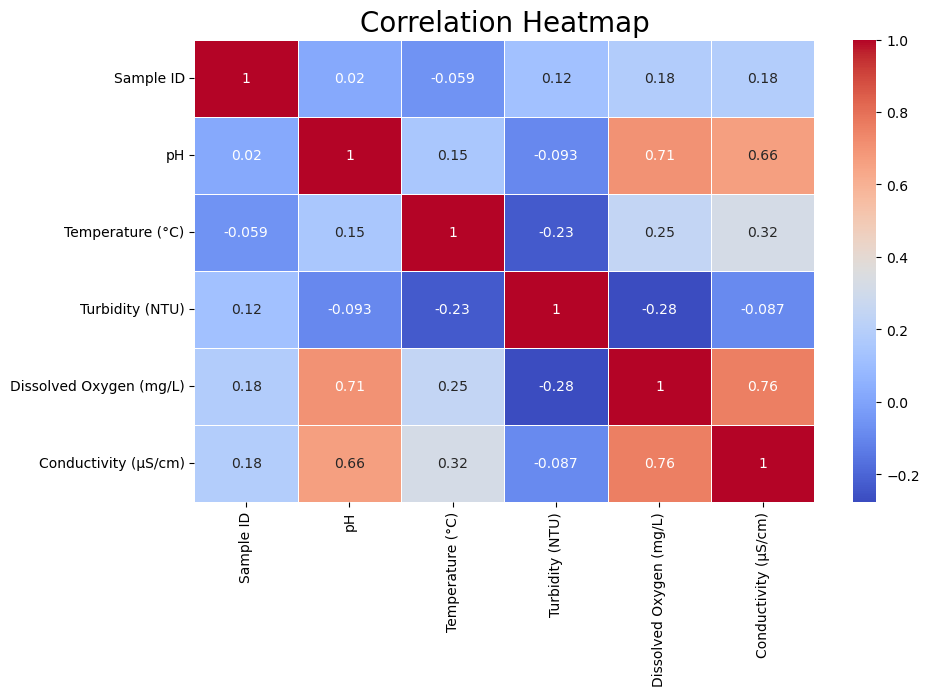

In [9]:
plt.figure(figsize=(10, 6))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap', size=20)
plt.show()

**Dissolved Oxygen and Conductivity seems strongly correlated with pH**, let's try ti ind if there is multicolinearity

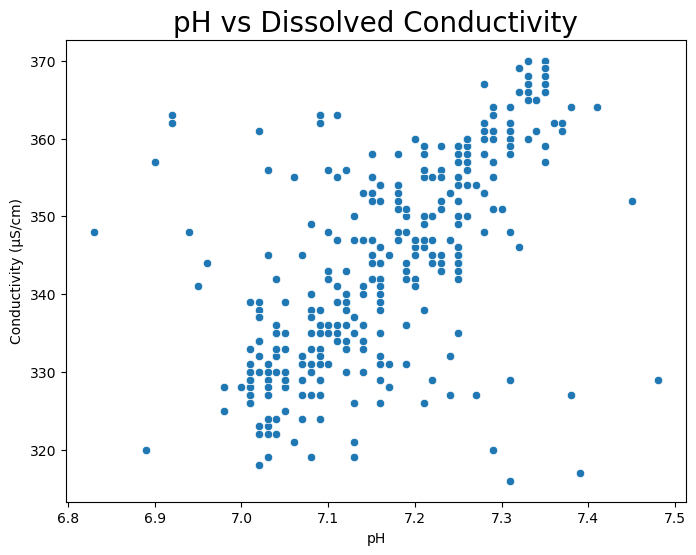

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='pH', y='Conductivity (µS/cm)')
plt.title('pH vs Dissolved Conductivity', size=20)
plt.xlabel('pH')
plt.ylabel('Conductivity (µS/cm)')
plt.show()
